# Analysis

In [1]:
#!python3 -m pip install --user japanize-matplotlib

## import ライブラリー

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import japanize_matplotlib

## Data定義

In [3]:
%%time
df_subjects_info = pd.read_csv('../02_data_analysis/subjects_info/subjects_info.csv')
#df_aal = pd.read_csv('../02_data_analysis/roi_timeseries/timeseries_aal.csv')
#df_ho = pd.read_csv('../02_data_analysis/roi_timeseries/timeseries_ho.csv')

#df_dynamic_aal = pd.read_csv('../02_data_analysis/dynamic_FC/dynamic_aal.csv')
#df_dynamic_ho = pd.read_csv('../02_data_analysis/dynamic_FC/dynamic_ho.csv')

CPU times: user 28.8 ms, sys: 399 µs, total: 29.2 ms
Wall time: 36 ms


In [4]:
def make_info_data(df = df_subjects_info,col = ['Age','Sex','やる気スコア(Apathy scale)']):
    subID = np.array(df.subID)
    subjects_info_list = []
    for ID in subID:
        data = np.array(df[df.subID == ID][col])[0]
        if 'Sex' in col:
            idx_sex = col.index('Sex')
            if data[idx_sex] == '男':
                data[idx_sex] = 0
            else:
                data[idx_sex] = 1
        
        subjects_info_list.append(data)
    subjects_info = np.array(subjects_info_list)
    
    if 'Age' in col:
        idx_age = col.index('Age')
    else:
        idx_age = None
    for i in range(len(col)):
        if i == idx_age:
            subjects_info[:,i] = (subjects_info[:,i] - \
                                  np.mean(subjects_info[:,i]))/np.std(subjects_info[:,i])
    return subjects_info.astype(np.float)

def make_data(df, subID = df_subjects_info.subID ,remove_list = ['time','subID']):
    data_list = []
    df_cols = list(df.columns)
    for r in remove_list:
        try:
            df_cols.remove(r)
        except:
            pass
    for ID in df_subjects_info.subID:
        data = df[df.subID == ID][df_cols]
        data = np.array(data)
        data_list.append(data)
    data = np.array(data_list)
    return data

In [5]:
%%time
data_label = make_info_data()
age_mean= df_subjects_info.Age.mean()
age_std = df_subjects_info.Age.std()

#data_aal = make_data(df_aal)
#data_ho = make_data(df_ho)
#data_dynamic_aal = make_data(df_dynamic_aal)
#data_dynamic_ho  = make_data(df_dynamic_ho)

CPU times: user 1.05 s, sys: 1.41 ms, total: 1.05 s
Wall time: 1.05 s


In [6]:
roi_list = ['msdl',
            'Yeo',
            'aal',
            'ho',
            'destrieux',
            #'Dosenbach',
            #'Power',
            #'seitzman'
           ]

In [7]:
def variable_name(roi = ''):
    user_input = f'{roi}_1'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/{roi}_1.npz', allow_pickle=True)
    user_input = f'{roi}_2'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/{roi}_2.npz', allow_pickle=True)
    user_input = f'{roi}_dynamic_1'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/{roi}_dynamic_1.npz', allow_pickle=True)
    user_input = f'{roi}_dynamic_2'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/{roi}_dynamic_2.npz', allow_pickle=True)
    
    name = f'{roi}_1'
    user_input = f'test_pred_{roi}_1'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_{roi}_corrected_1'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_{roi}_1'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_{roi}_1'
    globals()[user_input] = eval(name)['arr_3']
    
    name = f'{roi}_2'
    user_input = f'test_pred_{roi}_2'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_{roi}_corrected_2'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_{roi}_2'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_{roi}_2'
    globals()[user_input] = eval(name)['arr_3']
    
    name = f'{roi}_dynamic_1'
    user_input = f'test_pred_{roi}_dynamic_1'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_{roi}_dynamic_corrected_1'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_{roi}_dynamic_1'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_{roi}_dynamic_1'
    globals()[user_input] = eval(name)['arr_3']
    
    name = f'{roi}_dynamic_2'
    user_input = f'test_pred_{roi}_dynamic_2'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_{roi}_dynamic_corrected_2'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_{roi}_dynamic_2'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_{roi}_dynamic_2'
    globals()[user_input] = eval(name)['arr_3']

In [8]:
for roi_name in roi_list:
    variable_name(roi_name)

In [9]:
def variable_name_LSTM(roi = ''):
    user_input = f'{roi}_lstm'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/{roi}_lstm.npz', allow_pickle=True)
    user_input = f'{roi}_lstm_bi'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/{roi}_lstm_bi.npz', allow_pickle=True)
    user_input = f'{roi}_dynamic_lstm'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/{roi}_lstm_dynamic.npz', allow_pickle=True)
    user_input = f'{roi}_dynamic_lstm_bi'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/{roi}_lstm_dynamic_bi.npz', allow_pickle=True)
    
    name = f'{roi}_lstm'
    user_input = f'test_pred_{roi}_lstm'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_{roi}_corrected_lstm'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_{roi}_lstm'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_{roi}_lstm'
    globals()[user_input] = eval(name)['arr_3']
    
    name = f'{roi}_lstm_bi'
    user_input = f'test_pred_{roi}_lstm_bi'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_{roi}_corrected_lstm_bi'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_{roi}_lstm_bi'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_{roi}_lstm_bi'
    globals()[user_input] = eval(name)['arr_3']
    
    name = f'{roi}_dynamic_lstm'
    user_input = f'test_pred_{roi}_dynamic_lstm'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_{roi}_dynamic_corrected_lstm'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_{roi}_dynamic_lstm'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_{roi}_dynamic_lstm'
    globals()[user_input] = eval(name)['arr_3']
    
    name = f'{roi}_dynamic_lstm_bi'
    user_input = f'test_pred_{roi}_dynamic_lstm_bi'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_{roi}_dynamic_corrected_lstm_bi'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_{roi}_dynamic_lstm_bi'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_{roi}_dynamic_lstm_bi'
    globals()[user_input] = eval(name)['arr_3']

In [10]:
for roi_name in roi_list:
    variable_name_LSTM(roi_name)

In [11]:
def variable_name_Multi(roi = ''):
    user_input = f'multi_{roi}_1'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/multi_smooth_{roi}_1.npz', allow_pickle=True)
    user_input = f'multi_{roi}_2'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/multi_smooth_{roi}_2.npz', allow_pickle=True)
    user_input = f'multi_{roi}_dynamic_1'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/multi_smooth_{roi}_dynamic_1.npz', allow_pickle=True)
    user_input = f'multi_{roi}_dynamic_2'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/multi_smooth_{roi}_dynamic_2.npz', allow_pickle=True)
    
    name = f'multi_{roi}_1'
    user_input = f'test_pred_multi_{roi}_1'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_multi_{roi}_corrected_1'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_multi_{roi}_1'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_multi_{roi}_1'
    globals()[user_input] = eval(name)['arr_3']
    
    name = f'multi_{roi}_2'
    user_input = f'test_pred_multi_{roi}_2'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_multi_{roi}_corrected_2'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_multi_{roi}_2'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_multi_{roi}_2'
    globals()[user_input] = eval(name)['arr_3']
    
    name = f'multi_{roi}_dynamic_1'
    user_input = f'test_pred_multi_{roi}_dynamic_1'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_multi_{roi}_dynamic_corrected_1'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_multi_{roi}_dynamic_1'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_multi_{roi}_dynamic_1'
    globals()[user_input] = eval(name)['arr_3']
    
    name = f'multi_{roi}_dynamic_2'
    user_input = f'test_pred_multi_{roi}_dynamic_2'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_multi_{roi}_dynamic_corrected_2'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_multi_{roi}_dynamic_2'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_multi_{roi}_dynamic_2'
    globals()[user_input] = eval(name)['arr_3']

In [12]:
for roi_name in roi_list:
    variable_name_Multi(roi_name)

In [13]:
def variable_name_Single(roi = ''):
    user_input = f'single_{roi}_1'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/single_smooth_{roi}_1.npz', allow_pickle=True)
    user_input = f'single_{roi}_2'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/single_smooth_{roi}_2.npz', allow_pickle=True)
    user_input = f'single_{roi}_dynamic_1'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/single_smooth_{roi}_dynamic_1.npz', allow_pickle=True)
    user_input = f'single_{roi}_dynamic_2'
    globals()[user_input] = np.load(f'../02_data_analysis/temp/single_smooth_{roi}_dynamic_2.npz', allow_pickle=True)
    
    name = f'single_{roi}_1'
    user_input = f'test_pred_single_{roi}_1'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_single_{roi}_corrected_1'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_single_{roi}_1'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_single_{roi}_1'
    globals()[user_input] = eval(name)['arr_3']
    
    name = f'single_{roi}_2'
    user_input = f'test_pred_single_{roi}_2'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_single_{roi}_corrected_2'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_single_{roi}_2'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_single_{roi}_2'
    globals()[user_input] = eval(name)['arr_3']
    
    name = f'single_{roi}_dynamic_1'
    user_input = f'test_pred_single_{roi}_dynamic_1'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_single_{roi}_dynamic_corrected_1'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_single_{roi}_dynamic_1'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_single_{roi}_dynamic_1'
    globals()[user_input] = eval(name)['arr_3']
    
    name = f'single_{roi}_dynamic_2'
    user_input = f'test_pred_single_{roi}_dynamic_2'
    globals()[user_input] = eval(name)['arr_0']
    user_input = f'test_pred_single_{roi}_dynamic_corrected_2'
    globals()[user_input] = eval(name)['arr_1']
    user_input = f'test_label_single_{roi}_dynamic_2'
    globals()[user_input] = eval(name)['arr_2']
    user_input = f'test_idx_single_{roi}_dynamic_2'
    globals()[user_input] = eval(name)['arr_3']

In [14]:
for roi_name in roi_list:
    variable_name_Single(roi_name)

## 予測結果

In [15]:
np.all(test_label_msdl_1 == test_label_msdl_2)
test_label = test_label_msdl_1
np.all(test_idx_msdl_1 == test_idx_msdl_2)
test_idx = test_idx_msdl_1

True

True

In [16]:
n_splits = len(test_idx_msdl_1)

In [17]:
def mean_absolute_error_pred(preds,labels):
    for i in range(n_splits):
        if not i:
            label = labels[i,:,0:1]
        else:
            label = np.concatenate([label,labels[i,:,0:1]])

    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)[:,0:1]
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])
            
    label = label.reshape(-1)
    label = label*age_std+age_mean
    pred  = pred.reshape(-1)
    pred  = pred*age_std+age_mean
    
    return mean_absolute_error(pred,label)

def mean_squared_error_pred(preds,labels):
    for i in range(n_splits):
        if not i:
            label = labels[i,:,0:1]
        else:
            label = np.concatenate([label,labels[i,:,0:1]])

    for i in range(n_splits):
        if not i:
            pred = preds[i].mean(axis=0)[:,0:1]
        else:
            pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])
    
    label = label.reshape(-1)
    label = label*age_std+age_mean
    pred  = pred.reshape(-1)
    pred  = pred*age_std+age_mean
    
    return mean_squared_error(pred,label)

In [18]:
print('AAL Transformer')
mean_absolute_error_pred(test_pred_aal_1,test_label)
mean_absolute_error_pred(test_pred_aal_2,test_label)
mean_absolute_error_pred(test_pred_aal_dynamic_1,test_label)
mean_absolute_error_pred(test_pred_aal_dynamic_2,test_label)

print('AAL Multi Transformer')
mean_absolute_error_pred(test_pred_multi_aal_1,test_label)
mean_absolute_error_pred(test_pred_multi_aal_2,test_label)
mean_absolute_error_pred(test_pred_multi_aal_dynamic_1,test_label)
mean_absolute_error_pred(test_pred_multi_aal_dynamic_2,test_label)

print('AAL LSTM')
mean_absolute_error_pred(test_pred_aal_lstm,test_label)
mean_absolute_error_pred(test_pred_aal_lstm_bi,test_label)
mean_absolute_error_pred(test_pred_aal_dynamic_lstm,test_label)
mean_absolute_error_pred(test_pred_aal_dynamic_lstm_bi,test_label)

AAL Transformer


8.344981455871606

8.316643974436607

8.58145617964987

8.710014010935456

AAL Multi Transformer


8.551378967410564

8.496075465080187

8.608539981469612

8.62177725678544

AAL LSTM


8.621858368742116

9.171760635882

8.621729427358149

8.75685752626647

In [19]:
print('Harvard-Oxford Transformer')
mean_absolute_error_pred(test_pred_ho_1,test_label)
mean_absolute_error_pred(test_pred_ho_2,test_label)
mean_absolute_error_pred(test_pred_ho_dynamic_1,test_label)
mean_absolute_error_pred(test_pred_ho_dynamic_2,test_label)

print('Harvard-Oxford Multi Transformer')
mean_absolute_error_pred(test_pred_multi_ho_1,test_label)
mean_absolute_error_pred(test_pred_multi_ho_2,test_label)
mean_absolute_error_pred(test_pred_multi_ho_dynamic_1,test_label)
mean_absolute_error_pred(test_pred_multi_ho_dynamic_2,test_label)

print('Harvard-Oxford LSTM')
mean_absolute_error_pred(test_pred_ho_lstm,test_label)
mean_absolute_error_pred(test_pred_ho_lstm_bi,test_label)
mean_absolute_error_pred(test_pred_ho_dynamic_lstm,test_label)
mean_absolute_error_pred(test_pred_ho_dynamic_lstm_bi,test_label)

Harvard-Oxford Transformer


8.733321584221313

8.939323797509617

8.182145476400848

8.304340580103462

Harvard-Oxford Multi Transformer


8.819089075810972

9.047169517236679

8.276954987919623

8.591003123594032

Harvard-Oxford LSTM


8.811098226420343

8.770974718194154

8.456507401281621

8.942631096139863

In [20]:
def test_plot(preds_ROI1,
              preds_ROI2,
              preds_dfc1,
              preds_dfc2,
              labels,
              title=''):
    preds_list = [preds_ROI1,
                 preds_ROI2,
                 preds_dfc1,
                 preds_dfc2]
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 12), dpi=96)
    fig.suptitle(title, fontsize=14, x=0.5, y=0.92)   # 図のタイトル
    plt.subplots_adjust(wspace=0.2, hspace=0.25)
    
    for n, preds in enumerate(preds_list):
    
        for i in range(n_splits):
            if not i:
                label = labels[i,:,0:1]
            else:
                label = np.concatenate([label,labels[i,:,0:1]])

        for i in range(n_splits):
            if not i:
                pred = preds[i].mean(axis=0)[:,0:1]
            else:
                pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])

        if n == 0:
            lis = [0,0]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model'
            else:
                tit = 'ROI Model 1'
        elif n == 1:
            lis = [0,1]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model Bidirectional'
            else:
                tit = 'ROI Model 2'
        elif n == 2:
            lis = [1,0]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model'
            else:
                tit = 'dFC Model 1'
        elif n == 3:
            lis = [1,1]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model Bidirectional'
            else:
                tit = 'dFC Model 2'
        
        new_line = '\n'
        
        lr = LinearRegression()
        lr.fit(label*age_std+age_mean,pred[:,0]*age_std+age_mean)
        corr,p = pearsonr(label[:,0],pred[:,0])
        mae = mean_absolute_error_pred(preds,labels)
        
        axs[lis[0], lis[1]].scatter(label[:,0]*age_std+age_mean,pred[:,0]*age_std+age_mean,
                   label = f'corrcoef : {corr:.3f}{new_line}p value : {p}{new_line}MAE : {mae}')
        
        plt.axes(axs[lis[0], lis[1]])
        plt.plot(label[:,0]*age_std+age_mean,
                 lr.predict(label*age_std+age_mean), color = 'red',
                label = f'y = {lr.coef_[0]:.3f}x + {lr.intercept_:.3f}')#回帰直線をプロット
        plt.title(tit, fontsize=14)    # x軸のラベル
        plt.xlabel('Chronological Age', fontsize=14)    # x軸のラベル
        plt.ylabel('Predicted Age', fontsize=14)  # y軸のラベル
        plt.legend(fontsize=10.5)
        plt.grid()                     # グリッド線を表示
        
    path = '../04_result/image/'
    title = title.split()
    path += 'Predict_'
    for s in title:
        path += s + '_'
    path = path[:-1] + '.png'

    fig.savefig(path)

In [21]:
def corrected_predicted_age(preds_ROI1,
                            preds_ROI2,
                            preds_dfc1,
                            preds_dfc2,
                            labels):
    preds_list = [preds_ROI1,
                 preds_ROI2,
                 preds_dfc1,
                 preds_dfc2]
    
    corrected_preds_all = []
    for n, preds in enumerate(preds_list):
        corrected_preds = []
        for i in range(n_splits):
            label = labels[i,:,0:1]
            pred = preds[i].mean(axis=0)[:,0:1]
            lr = LinearRegression()
            lr.fit(label*age_std+age_mean,pred[:,0]*age_std+age_mean)
            corrected_pred = pred[:,0]*age_std+age_mean + label[:,0]*age_std+age_mean - (lr.coef_[0] * (label[:,0]*age_std+age_mean) + lr.intercept_)
            corrected_pred = (corrected_pred - age_mean) / age_std
            corrected_pred = corrected_pred.reshape(1,corrected_pred.shape[0],1)
            corrected_preds.append(corrected_pred)
        corrected_preds_all.append(corrected_preds)
    return np.array(corrected_preds_all)

In [22]:
def test_plot_all(model = 'transformer',
                  roi_list = roi_list,
                  corrected = False,
                  corrected_leak = False):
    if corrected:
        if corrected_leak:
            for roi in roi_list:
                if model == 'transformer':
                    test_plot(eval(f'test_corrected_pred_{roi}_1'),
                              eval(f'test_corrected_pred_{roi}_2'),
                              eval(f'test_corrected_pred_{roi}_dynamic_1'),
                              eval(f'test_corrected_pred_{roi}_dynamic_2'),
                              test_label,
                              f'Corrected 2 {roi} Transformer')
                elif model == 'LSTM':
                    test_plot(eval(f'test_corrected_pred_{roi}_lstm'),
                              eval(f'test_corrected_pred_{roi}_lstm_bi'),
                              eval(f'test_corrected_pred_{roi}_dynamic_lstm'),
                              eval(f'test_corrected_pred_{roi}_dynamic_lstm_bi'),
                              test_label,
                              f'Corrected 2 {roi} LSTM')
                elif 'Multi' in model:
                    test_plot(eval(f'test_corrected_pred_multi_{roi}_1'),
                              eval(f'test_corrected_pred_multi_{roi}_2'),
                              eval(f'test_corrected_pred_multi_{roi}_dynamic_1'),
                              eval(f'test_corrected_pred_multi_{roi}_dynamic_2'),
                              test_label,
                              f'Corrected 2 {roi} Multi')
        else:
            for roi in roi_list:
                if model == 'transformer':
                    test_plot(eval(f'test_pred_{roi}_corrected_1'),
                              eval(f'test_pred_{roi}_corrected_2'),
                              eval(f'test_pred_{roi}_dynamic_corrected_1'),
                              eval(f'test_pred_{roi}_dynamic_corrected_2'),
                              test_label,
                              f'Corrected 1 {roi} Transformer')
                elif model == 'LSTM':
                    test_plot(eval(f'test_pred_{roi}_corrected_lstm'),
                              eval(f'test_pred_{roi}_corrected_lstm_bi'),
                              eval(f'test_pred_{roi}_dynamic_corrected_lstm'),
                              eval(f'test_pred_{roi}_dynamic_corrected_lstm_bi'),
                              test_label,
                              f'Corrected 1 {roi} LSTM')
                elif 'Multi' in model:
                    test_plot(eval(f'test_pred_multi_{roi}_corrected_1'),
                              eval(f'test_pred_multi_{roi}_corrected_2'),
                              eval(f'test_pred_multi_{roi}_dynamic_corrected_1'),
                              eval(f'test_pred_multi_{roi}_dynamic_corrected_2'),
                              test_label,
                              f'Corrected 1 {roi} Multi')
            
    else:
        for roi in roi_list:
            if model == 'transformer':
                test_plot(eval(f'test_pred_{roi}_1'),
                          eval(f'test_pred_{roi}_2'),
                          eval(f'test_pred_{roi}_dynamic_1'),
                          eval(f'test_pred_{roi}_dynamic_2'),
                          test_label,
                          f'{roi} Transformer')
            elif model == 'LSTM':
                test_plot(eval(f'test_pred_{roi}_lstm'),
                          eval(f'test_pred_{roi}_lstm_bi'),
                          eval(f'test_pred_{roi}_dynamic_lstm'),
                          eval(f'test_pred_{roi}_dynamic_lstm_bi'),
                          test_label,
                          f'{roi} LSTM')
            elif 'Multi' in model:
                test_plot(eval(f'test_pred_multi_{roi}_1'),
                          eval(f'test_pred_multi_{roi}_2'),
                          eval(f'test_pred_multi_{roi}_dynamic_1'),
                          eval(f'test_pred_multi_{roi}_dynamic_2'),
                          test_label,
                          f'{roi} Multi')

In [23]:
def corrected_predicted_age_all(model = 'transformer',
                                roi_list = roi_list):
    for roi in roi_list:
        print(f'{model}:{roi}')
        if model == 'transformer':
            user_input1 = f'test_corrected_pred_{roi}_1'
            user_input2 = f'test_corrected_pred_{roi}_2'
            user_input3 = f'test_corrected_pred_{roi}_dynamic_1'
            user_input4 = f'test_corrected_pred_{roi}_dynamic_2'
            
            globals()[user_input1],\
            globals()[user_input2],\
            globals()[user_input3],\
            globals()[user_input4] = corrected_predicted_age(eval(f'test_pred_{roi}_1'),
                                                             eval(f'test_pred_{roi}_2'),
                                                             eval(f'test_pred_{roi}_dynamic_1'),
                                                             eval(f'test_pred_{roi}_dynamic_2'),
                                                             test_label
                                                            )
        elif model == 'LSTM':
            user_input1 = f'test_corrected_pred_{roi}_lstm'
            user_input2 = f'test_corrected_pred_{roi}_lstm_bi'
            user_input3 = f'test_corrected_pred_{roi}_dynamic_lstm'
            user_input4 = f'test_corrected_pred_{roi}_dynamic_lstm_bi'
            
            globals()[user_input1],\
            globals()[user_input2],\
            globals()[user_input3],\
            globals()[user_input4] = corrected_predicted_age(eval(f'test_pred_{roi}_lstm'),
                                                             eval(f'test_pred_{roi}_lstm_bi'),
                                                             eval(f'test_pred_{roi}_dynamic_lstm'),
                                                             eval(f'test_pred_{roi}_dynamic_lstm_bi'),
                                                             test_label
                                                            )
            
        elif 'Multi' in model:
            
            user_input1 = f'test_corrected_pred_multi_{roi}_1'
            user_input2 = f'test_corrected_pred_multi_{roi}_2'
            user_input3 = f'test_corrected_pred_multi_{roi}_dynamic_1'
            user_input4 = f'test_corrected_pred_multi_{roi}_dynamic_2'
            
            globals()[user_input1],\
            globals()[user_input2],\
            globals()[user_input3],\
            globals()[user_input4] = corrected_predicted_age(eval(f'test_pred_multi_{roi}_1'),
                                                             eval(f'test_pred_multi_{roi}_2'),
                                                             eval(f'test_pred_multi_{roi}_dynamic_1'),
                                                             eval(f'test_pred_multi_{roi}_dynamic_2'),
                                                             test_label)

In [24]:
corrected_predicted_age_all()
corrected_predicted_age_all('LSTM')
corrected_predicted_age_all('Multi')

transformer:msdl
transformer:Yeo
transformer:aal
transformer:ho
transformer:destrieux
LSTM:msdl
LSTM:Yeo
LSTM:aal
LSTM:ho
LSTM:destrieux
Multi:msdl
Multi:Yeo
Multi:aal
Multi:ho
Multi:destrieux


### Transformer

In [25]:
#test_plot_all()
#test_plot_all(corrected = True)
#test_plot_all(corrected = True,corrected_leak = True)

### LSTM

In [26]:
#test_plot_all(model = 'LSTM')
#test_plot_all(model = 'LSTM', corrected = True)
#test_plot_all(model = 'LSTM', corrected = True,corrected_leak = True)

### Multi

In [27]:
#test_plot_all(model = 'Multi')
#test_plot_all(model = 'Multi', corrected = True)
#test_plot_all(model = 'Multi', corrected = True,corrected_leak = True)

## やる気スコアとの相関

In [28]:
def test_compare(preds_ROI1,
                 preds_ROI2,
                 preds_dfc1,
                 preds_dfc2,
                 labels,
                 title='',
                 test_idxs = test_idx,
                 index = 'やる気スコア(Apathy scale)'
                ):
    preds_list = [preds_ROI1,
                 preds_ROI2,
                 preds_dfc1,
                 preds_dfc2]
    
    data_label = make_info_data(col = [index])
    
    fig, axs = plt.subplots(4, 3, figsize=(15, 24), dpi=96)
    fig.suptitle(index + ' ' + title, fontsize=16, x=0.5, y=0.92)   # 図のタイトル
    plt.subplots_adjust(wspace=0.2, hspace=0.3)
    
    for n, preds in enumerate(preds_list):
    
        for i in range(n_splits):
            if not i:
                label = labels[i,:,0:1]
            else:
                label = np.concatenate([label,labels[i,:,0:1]])

        for i in range(n_splits):
            if not i:
                pred = preds[i].mean(axis=0)[:,0:1]
            else:
                pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])
    
        for i in range(n_splits):
            if not i:
                test_idx = test_idxs[i]
            else:
                test_idx = np.concatenate([test_idx,test_idxs[i]])
                
        if n == 0:
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model'
            else:
                tit = 'ROI Model 1'
        elif n == 1:
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model Bidirectional'
            else:
                tit = 'ROI Model 2'
        elif n == 2:
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model'
            else:
                tit = 'dFC Model 1'
        elif n == 3:
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model Bidirectional'
            else:
                tit = 'dFC Model 2'
            
        new_line = '\n'


        label = label.reshape(-1)
        label = label*age_std+age_mean
        pred  = pred.reshape(-1)
        pred  = pred*age_std+age_mean 
        diff  = pred - label
    
        corr_diff,p_diff = pearsonr(diff,data_label[test_idx][:,0])
        corr_pred,p_pred = pearsonr(pred,data_label[test_idx][:,0])
        corr_label,p_label = pearsonr(label,data_label[test_idx][:,0])
        
        axs[n,0].scatter(label,data_label[test_idx][:,0],
                   label = f'corrcoef label: {corr_label:.3f},p value : {p_label:.3f}')#散布図をプロット
        plt.axes(axs[n,0])
        plt.xlabel('Chronological Age', fontsize=14)    # x軸のラベル
        plt.ylabel('apathy scale', fontsize=14)  # y軸のラベル
        plt.legend(fontsize=10.5)
        plt.grid()                     # グリッド線を表示

        axs[n,1].scatter(pred,data_label[test_idx][:,0],
                   label = f'corrcoef pred: {corr_pred:.3f},p value : {p_pred:.3f}')#散布図をプロット
        plt.axes(axs[n,1])
        plt.xlabel('Corrcted Predicted Age', fontsize=14)    # x軸のラベル
        plt.ylabel('apathy scale', fontsize=14)  # y軸のラベル
        plt.title(tit, fontsize=14)
        plt.legend(fontsize=10.5)
        plt.grid()                     # グリッド線を表示
        
        axs[n,2].scatter(diff,data_label[test_idx][:,0],
                   label = f'corrcoef diff: {corr_diff:.3f},p value : {p_diff:.3f}')#散布図をプロット
        plt.axes(axs[n,2])
        plt.xlabel('Corrcted Predicted Age - Chronological Age', fontsize=14)    # x軸のラベル
        plt.ylabel('apathy scale', fontsize=14)  # y軸のラベル
        plt.legend(fontsize=10.5)
        plt.grid()                     # グリッド線を表示
        

    plt.show()
    
    path = '../04_result/image/'
    title = title.split()
    for s in title:
        path += s + '_'
    path = path[:-1] + '.png'

    fig.savefig(path)

In [29]:
def test_compare_all(model = 'transformer',
                     roi_list = roi_list,
                     corrected_leak = True,
                     index = 'やる気スコア(Apathy scale)'
                    ):
    if corrected_leak:
        for roi in roi_list:
            if model == 'transformer':
                test_compare(eval(f'test_corrected_pred_{roi}_1'),
                             eval(f'test_corrected_pred_{roi}_2'),
                             eval(f'test_corrected_pred_{roi}_dynamic_1'),
                             eval(f'test_corrected_pred_{roi}_dynamic_2'),
                             test_label,
                             f'Age Correlation 2 {roi} Transformer',
                             index = index)
            elif model == 'LSTM':
                test_compare(eval(f'test_corrected_pred_{roi}_lstm'),
                             eval(f'test_corrected_pred_{roi}_lstm_bi'),
                             eval(f'test_corrected_pred_{roi}_dynamic_lstm'),
                             eval(f'test_corrected_pred_{roi}_dynamic_lstm_bi'),
                             test_label,
                             f'Age Correlation 2 {roi} LSTM',
                             index = index)
            elif 'Multi' in model:
                test_compare(eval(f'test_corrected_pred_multi_{roi}_1'),
                             eval(f'test_corrected_pred_multi_{roi}_2'),
                             eval(f'test_corrected_pred_multi_{roi}_dynamic_1'),
                             eval(f'test_corrected_pred_multi_{roi}_dynamic_2'),
                             test_label,
                             f'Age Correlation 2 {roi} Multi',
                             index = index)
    else:
        for roi in roi_list:
            if model == 'transformer':
                test_compare(eval(f'test_pred_{roi}_corrected_1'),
                             eval(f'test_pred_{roi}_corrected_2'),
                             eval(f'test_pred_{roi}_dynamic_corrected_1'),
                             eval(f'test_pred_{roi}_dynamic_corrected_2'),
                             test_label,
                             f'Age Correlation 1 {roi} Transformer',
                             index = index)
            elif model == 'LSTM':
                test_compare(eval(f'test_pred_{roi}_corrected_lstm'),
                             eval(f'test_pred_{roi}_corrected_lstm_bi'),
                             eval(f'test_pred_{roi}_dynamic_corrected_lstm'),
                             eval(f'test_pred_{roi}_dynamic_corrected_lstm_bi'),
                             test_label,
                             f'Age Correlation 1 {roi} LSTM',
                             index = index)
            elif 'Multi' in model:
                test_compare(eval(f'test_pred_multi_{roi}_corrected_1'),
                             eval(f'test_pred_multi_{roi}_corrected_2'),
                             eval(f'test_pred_multi_{roi}_dynamic_corrected_1'),
                             eval(f'test_pred_multi_{roi}_dynamic_corrected_2'),
                             test_label,
                             f'Age Correlation 1 {roi} Multi',
                             index = index)

### Transformer

In [30]:
#SDS（自己評価式抑うつ性尺度)
#岡部

In [31]:
#test_compare_all()
#test_compare_all(corrected_leak = False)

### LSTM

In [32]:
#test_compare_all(model = 'LSTM')
#test_compare_all(model = 'LSTM', corrected_leak = False)

### Multi

In [33]:
#test_compare_all(model = 'Multi')
#test_compare_all(model = 'Multi', corrected_leak = False)

### 検定

In [34]:
def test_t_test(preds_ROI1,
                preds_ROI2,
                preds_dfc1,
                preds_dfc2,
                labels,
                title='',
                test_idxs = test_idx,
                index = 'やる気スコア(Apathy scale)'
               ):
    preds_list = [preds_ROI1,
                 preds_ROI2,
                 preds_dfc1,
                 preds_dfc2]
    
    data_label = make_info_data(col = [index])

    for n, preds in enumerate(preds_list):
    
        for i in range(n_splits):
            if not i:
                label = labels[i,:,0:1]
            else:
                label = np.concatenate([label,labels[i,:,0:1]])

        for i in range(n_splits):
            if not i:
                pred = preds[i].mean(axis=0)[:,0:1]
            else:
                pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])
    
        for i in range(n_splits):
            if not i:
                test_idx = test_idxs[i]
            else:
                test_idx = np.concatenate([test_idx,test_idxs[i]])
                
        if n == 0:
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model'
            else:
                tit = 'ROI Model 1'
        elif n == 1:
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model Bidirectional'
            else:
                tit = 'ROI Model 2'
        elif n == 2:
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model'
            else:
                tit = 'dFC Model 1'
        elif n == 3:
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model Bidirectional'
            else:
                tit = 'dFC Model 2'
            
        new_line = '\n'


        label = label.reshape(-1)
        label = label*age_std+age_mean
        pred  = pred.reshape(-1)
        pred  = pred*age_std+age_mean 
        diff  = pred - label
        
        data_label = data_label.reshape(-1)
        
        diff_0 = diff[data_label >= 20]
        diff_1 = diff[data_label <= 10]
        
        #plt.hist(diff_0)
        #plt.show()
        #plt.hist(diff_1)
        #plt.show()
        #print(f'np.mean(diff_0):{np.mean(diff_0)}')
        #print(f'np.mean(diff_1):{np.mean(diff_1)}')
        
        t,p = stats.ttest_ind(diff_0,diff_1)
        print(f't:{t:.4f}')
        print(f'p:{p:.4f}')
        
        data_label_0 = data_label[diff >= 0]
        data_label_1 = data_label[diff <= -0]
        
        #plt.hist(data_label_0)
        #plt.show()
        #plt.hist(data_label_1)
        #plt.show()
        #print(f'np.mean(data_label_0):{np.mean(data_label_0)}')
        #print(f'np.mean(data_label_1):{np.mean(data_label_1)}')
        
        t,p = stats.ttest_ind(data_label_0,data_label_1)
        print(f't:{t:.4f}')
        print(f'p:{p:.4f}')

In [35]:
def test_t_test_all(model = 'transformer',
                     roi_list = roi_list,
                     corrected_leak = True,
                     index = 'やる気スコア(Apathy scale)'
                    ):
    if corrected_leak:
        for roi in roi_list:
            print(roi)
            if model == 'transformer':
                test_t_test(eval(f'test_corrected_pred_{roi}_1'),
                             eval(f'test_corrected_pred_{roi}_2'),
                             eval(f'test_corrected_pred_{roi}_dynamic_1'),
                             eval(f'test_corrected_pred_{roi}_dynamic_2'),
                             test_label,
                             f'Age Correlation 2 {roi} Transformer',
                             index = index)
            elif model == 'LSTM':
                test_t_test(eval(f'test_corrected_pred_{roi}_lstm'),
                             eval(f'test_corrected_pred_{roi}_lstm_bi'),
                             eval(f'test_corrected_pred_{roi}_dynamic_lstm'),
                             eval(f'test_corrected_pred_{roi}_dynamic_lstm_bi'),
                             test_label,
                             f'Age Correlation 2 {roi} LSTM',
                             index = index)
            elif 'Multi' in model:
                test_t_test(eval(f'test_corrected_pred_multi_{roi}_1'),
                             eval(f'test_corrected_pred_multi_{roi}_2'),
                             eval(f'test_corrected_pred_multi_{roi}_dynamic_1'),
                             eval(f'test_corrected_pred_multi_{roi}_dynamic_2'),
                             test_label,
                             f'Age Correlation 2 {roi} Multi',
                             index = index)
    else:
        for roi in roi_list:
            print(roi)
            if model == 'transformer':
                test_t_test(eval(f'test_pred_{roi}_corrected_1'),
                             eval(f'test_pred_{roi}_corrected_2'),
                             eval(f'test_pred_{roi}_dynamic_corrected_1'),
                             eval(f'test_pred_{roi}_dynamic_corrected_2'),
                             test_label,
                             f'Age Correlation 1 {roi} Transformer',
                             index = index)
            elif model == 'LSTM':
                test_t_test(eval(f'test_pred_{roi}_corrected_lstm'),
                             eval(f'test_pred_{roi}_corrected_lstm_bi'),
                             eval(f'test_pred_{roi}_dynamic_corrected_lstm'),
                             eval(f'test_pred_{roi}_dynamic_corrected_lstm_bi'),
                             test_label,
                             f'Age Correlation 1 {roi} LSTM',
                             index = index)
            elif 'Multi' in model:
                test_t_test(eval(f'test_pred_multi_{roi}_corrected_1'),
                             eval(f'test_pred_multi_{roi}_corrected_2'),
                             eval(f'test_pred_multi_{roi}_dynamic_corrected_1'),
                             eval(f'test_pred_multi_{roi}_dynamic_corrected_2'),
                             test_label,
                             f'Age Correlation 1 {roi} Multi',
                             index = index)

In [36]:
test_t_test_all()

msdl
t:0.7699
p:0.4419
t:0.6992
p:0.4847
t:0.3317
p:0.7403
t:0.7974
p:0.4255
t:1.0044
p:0.3159
t:1.7676
p:0.0776
t:0.7413
p:0.4590
t:-0.1997
p:0.8418
Yeo
t:0.0650
p:0.9482
t:0.9620
p:0.3364
t:-0.3306
p:0.7412
t:0.2480
p:0.8042
t:1.5367
p:0.1254
t:0.5267
p:0.5986
t:1.4836
p:0.1389
t:1.0056
p:0.3150
aal
t:1.8154
p:0.0704
t:0.0173
p:0.9862
t:2.0287
p:0.0433
t:0.3877
p:0.6984
t:1.5569
p:0.1205
t:0.0121
p:0.9903
t:2.1189
p:0.0349
t:1.1111
p:0.2670
ho
t:1.4622
p:0.1447
t:-0.7051
p:0.4810
t:1.7618
p:0.0790
t:0.4471
p:0.6550
t:1.6420
p:0.1016
t:0.4295
p:0.6677
t:1.8700
p:0.0624
t:-0.0747
p:0.9405
destrieux
t:1.5474
p:0.1227
t:0.3248
p:0.7455
t:1.2959
p:0.1959
t:0.7293
p:0.4661
t:0.9155
p:0.3606
t:0.4960
p:0.6201
t:1.0499
p:0.2945
t:-0.3283
p:0.7428


## 相補性

In [37]:
def test_complement(preds1,preds2,title=''):
    for i in range(n_splits):
        if not i:
            pred1 = preds1[i].mean(axis=0)
        else:
            pred1 = np.concatenate([pred1,preds1[i].mean(axis=0)])
    for i in range(n_splits):
        if not i:
            pred2 = preds2[i].mean(axis=0)
        else:
            pred2 = np.concatenate([pred2,preds2[i].mean(axis=0)])
    
    new_line = '\n'

    corr,p = pearsonr(pred1[:,0]*age_std + age_mean,pred2[:,0]*age_std + age_mean)
    lr = LinearRegression()
    lr.fit(pred1*age_std + age_mean,pred2[:,0]*age_std + age_mean)
    
    plt.figure(figsize=(6, 6), dpi=96)
    plt.scatter(pred1[:,0]*age_std + age_mean,pred2[:,0]*age_std + age_mean,
               label = f'corrcoef: {corr:.3f}{new_line}p value : {p}')
    plt.title(title, fontsize=14)   # 図のタイトル
    plt.legend(fontsize=10.5)
    plt.grid()                     # グリッド線を表示
    plt.show()                     # 図の表示

    print("相関係数: ", corr)
    print('r^2 data: ', r2_score(pred1[:,0],pred2[:,0]))
    print('切片: ', lr.intercept_)
    print('傾き: ', lr.coef_[0])

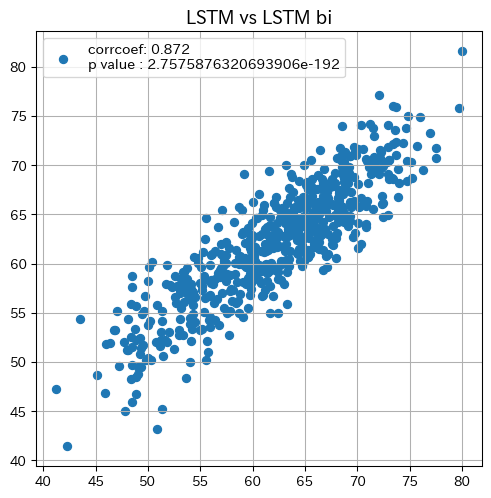

相関係数:  0.8719467153630405
r^2 data:  0.7599238209807084
切片:  15.9091835
傾き:  0.7448727


In [38]:
test_complement(test_pred_aal_lstm,test_pred_aal_lstm_bi,'LSTM vs LSTM bi')

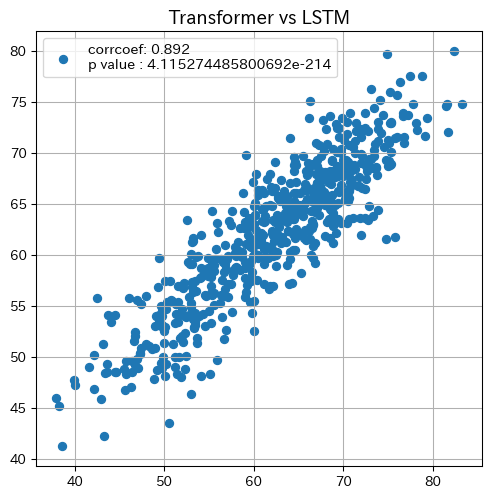

相関係数:  0.8924837708648612
r^2 data:  0.7890798416611688
切片:  17.457957737726865
傾き:  0.72054225004226


In [39]:
test_complement(test_pred_aal_1,test_pred_aal_lstm,'Transformer vs LSTM')

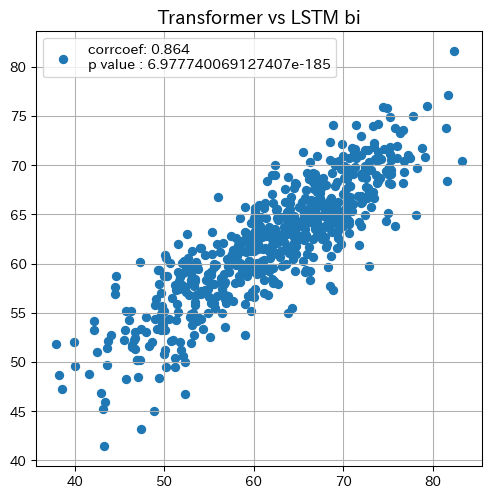

相関係数:  0.864053864099372
r^2 data:  0.7157822264915187
切片:  25.240048088925775
傾き:  0.5959254530763082


In [40]:
test_complement(test_pred_aal_1,test_pred_aal_lstm_bi,'Transformer vs LSTM bi')

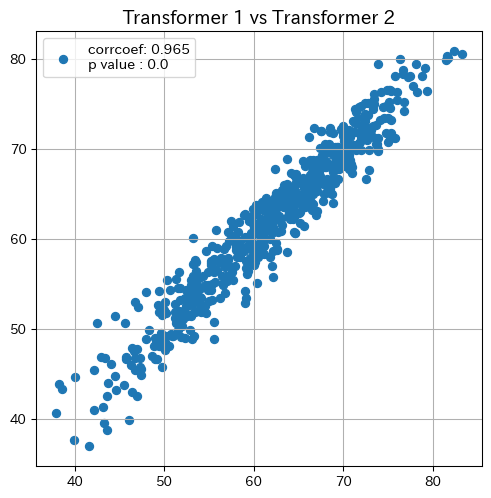

相関係数:  0.9648520126058379
r^2 data:  0.9303864936138253
切片:  2.8620376391005067
傾き:  0.9534494050085327


In [41]:
test_complement(test_pred_aal_1,test_pred_aal_2,'Transformer 1 vs Transformer 2')

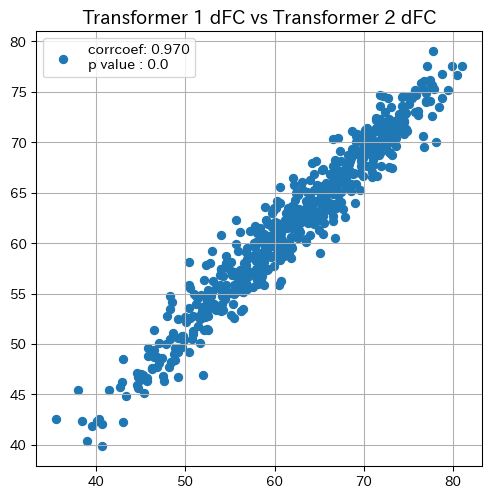

相関係数:  0.9704017789123648
r^2 data:  0.9321075837565101
切片:  9.381706522143261
傾き:  0.8473722842778505


In [42]:
test_complement(test_pred_aal_dynamic_1,test_pred_aal_dynamic_2,
                'Transformer 1 dFC vs Transformer 2 dFC')

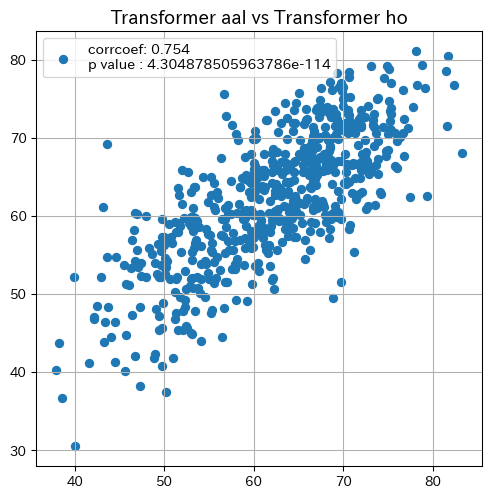

相関係数:  0.7542421281745746
r^2 data:  0.5203843553206008
切片:  16.462419106439228
傾き:  0.7349692737141295


In [43]:
test_complement(test_pred_aal_1,test_pred_ho_1,'Transformer aal vs Transformer ho')

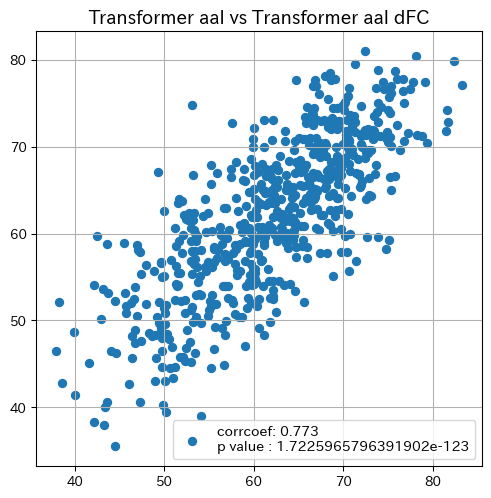

相関係数:  0.7734572856537634
r^2 data:  0.537535140842652
切片:  13.204964935935784
傾き:  0.7886193175376064


In [44]:
test_complement(test_pred_aal_1,test_pred_aal_dynamic_1,'Transformer aal vs Transformer aal dFC')

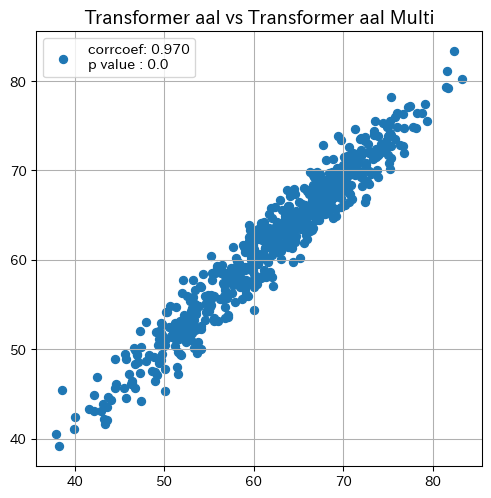

相関係数:  0.9704672114563936
r^2 data:  0.9404809104873939
切片:  5.392021557607187
傾き:  0.910662210868841


In [45]:
test_complement(test_pred_aal_1,test_pred_multi_aal_1,
                'Transformer aal vs Transformer aal Multi')

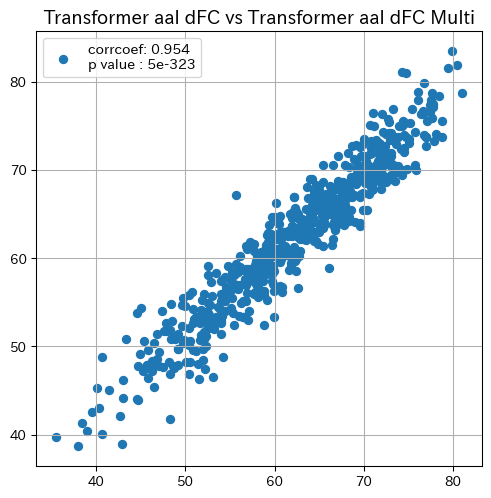

相関係数:  0.9540638823733258
r^2 data:  0.9094251554409388
切片:  6.434971221023893
傾き:  0.9002040505501179


In [46]:
test_complement(test_pred_aal_dynamic_1,test_pred_multi_aal_dynamic_1,
                'Transformer aal dFC vs Transformer aal dFC Multi')

## 男女分類

In [47]:
test_label_multi = test_label_multi_msdl_1

In [48]:
def test_sex_plot(preds_ROI1,
                  preds_ROI2,
                  preds_dfc1,
                  preds_dfc2,
                  labels,
                  title=''):
    preds_list = [preds_ROI1,
                  preds_ROI2,
                  preds_dfc1,
                  preds_dfc2]
    
    fig, axs = plt.subplots(2, 2, figsize=(12, 12), dpi=96)
    fig.suptitle(title, fontsize=14, x=0.5, y=0.92)   # 図のタイトル
    plt.subplots_adjust(wspace=0.2, hspace=0.25)
    
    for n, preds in enumerate(preds_list):
    
        for i in range(n_splits):
            if not i:
                label = labels[i,:,1:2]
            else:
                label = np.concatenate([label,labels[i,:,1:2]])

        for i in range(n_splits):
            if not i:
                pred = preds[i].mean(axis=0)[:,1:2]
            else:
                pred = np.concatenate([pred,preds[i].mean(axis=0)[:,1:2]])

        if n == 0:
            lis = [0,0]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model'
            else:
                tit = 'ROI Model 1'
        elif n == 1:
            lis = [0,1]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'ROI Model Bidirectional'
            else:
                tit = 'ROI Model 2'
        elif n == 2:
            lis = [1,0]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model'
            else:
                tit = 'dFC Model 1'
        elif n == 3:
            lis = [1,1]
            if 'LSTM' in title or 'lstm' in title:
                tit = 'dFC Model Bidirectional'
            else:
                tit = 'dFC Model 2'

        new_line = '\n'

        acc = 0
        for i,c in enumerate(label[:,0]):
            if c == 1:
                if pred[:,0][i] >= 0.5:
                    acc += 1
            else:
                if pred[:,0][i] < 0.5:
                    acc += 1
        q = 1/2
        n = len(label[:,0])
        z = (acc - n*q)/np.sqrt(n*q*(1-q))
        p = norm.sf(z)
        acc = acc/len(label[:,0])
        
        axs[lis[0], lis[1]].scatter(label[:,0],pred[:,0],label = f'train accuracy : {acc:.3f}{new_line}p value : {p}')
        
        plt.axes(axs[lis[0], lis[1]])
        plt.title(tit, fontsize=14)    # x軸のラベル
        plt.xlabel('chronological sex', fontsize=14)    # x軸のラベル
        plt.ylabel('predicted probability', fontsize=14)  # y軸のラベル
        plt.legend(fontsize=10.5)
        plt.grid()                     # グリッド線を表示
        
    path = '../04_result/image/'
    title = title.split()
    path += 'Gender_'
    for s in title:
        path += s + '_'
    path = path[:-1] + '.png'

    fig.savefig(path)

In [49]:
def test_sex_plot_all(model = 'Multi',
                      roi_list = roi_list,
                     ):
    for roi in roi_list:
        if model == 'Multi':
            test_sex_plot(eval(f'test_pred_multi_{roi}_1'),
                          eval(f'test_pred_multi_{roi}_2'),
                          eval(f'test_pred_multi_{roi}_dynamic_1'),
                          eval(f'test_pred_multi_{roi}_dynamic_2'),
                          test_label_multi,
                          f'Multi {roi} Transformer'
                         )
        elif model == 'Single':
            test_sex_plot(eval(f'test_pred_single_{roi}_1'),
                          eval(f'test_pred_single_{roi}_2'),
                          eval(f'test_pred_single_{roi}_dynamic_1'),
                          eval(f'test_pred_single_{roi}_dynamic_2'),
                          test_label_multi,
                          f'Single {roi} Transformer'
                         )
#test_sex_plot_all()
#test_sex_plot_all('Single')

## CSV化

### 年齢予測結果

In [50]:
def test_csv(labels,
              mode,
              *args,
              ):
    preds_lists = list(args)
    model_name = [0] * len(preds_lists) 
    
    if len(preds_lists) == 2:
        model_name[0] = 'Transformer AAL'
        model_name[1] = 'Transformer HO'
    elif len(preds_lists) == 4:
        model_name[0] = 'Transformer AAL'
        model_name[1] = 'Transformer HO'
        model_name[2] = 'LSTM AAL'
        model_name[3] = 'LSTM HO'
    
    n = len(preds_lists)
    
    df_mae = pd.DataFrame(np.arange(5*n).reshape(n, 5),
                  columns=[mode,'ROI1' ,'ROI2', 'dFC1', 'dFC2'])
    
    df_slope = pd.DataFrame(np.arange(5*n).reshape(n, 5),
                  columns=[mode,'ROI1' ,'ROI2', 'dFC1', 'dFC2'])
    
    for m , preds_list in enumerate(preds_lists):
        
        mae_lis = [model_name[m]]
        slope_lis = [model_name[m]]
        
        for n, preds in enumerate(preds_list):
            for i in range(n_splits):
                if not i:
                    label = labels[i,:,0:1]
                else:
                    label = np.concatenate([label,labels[i,:,0:1]])

            for i in range(n_splits):
                if not i:
                    pred = preds[i].mean(axis=0)[:,0:1]
                else:
                    pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])

            new_line = '\n'

            lr = LinearRegression()
            lr.fit(label*age_std+age_mean,pred[:,0]*age_std+age_mean)
            corr,p = pearsonr(label[:,0],pred[:,0])
            mae = mean_absolute_error_pred(preds,labels)
            mae_lis.append(round(mae, 3))
            slope_lis.append(round(lr.coef_[0], 3))
            
        df_mae.iloc[m] = mae_lis
        df_slope.iloc[m] = slope_lis
        
    path_mae = '../04_result/csv/' + mode + '_mae' + '.csv'
    df_mae.to_csv(path_mae, index=False)
    path_slope = '../04_result/csv/' + mode + '_slope' + '.csv'
    df_slope.to_csv(path_slope, index=False)

In [51]:
test_pred_aal_all = [test_pred_aal_1,
test_pred_aal_2,
test_pred_aal_dynamic_1,
test_pred_aal_dynamic_2]

test_pred_ho_all = [test_pred_ho_1,
test_pred_ho_2,
test_pred_ho_dynamic_1,
test_pred_ho_dynamic_2]

test_pred_aal_lstm_all = [test_pred_aal_lstm,
test_pred_aal_lstm_bi,
test_pred_aal_dynamic_lstm,
test_pred_aal_dynamic_lstm_bi]

test_pred_ho_lstm_all = [test_pred_ho_lstm,
test_pred_ho_lstm_bi,
test_pred_ho_dynamic_lstm,
test_pred_ho_dynamic_lstm_bi]

test_csv(test_label,
          'Normal',
          test_pred_aal_all,
          test_pred_ho_all,
          test_pred_aal_lstm_all,
          test_pred_ho_lstm_all)

In [52]:
test_pred_aal_corrected_all = [test_pred_aal_corrected_1,
test_pred_aal_corrected_2,
test_pred_aal_dynamic_corrected_1,
test_pred_aal_dynamic_corrected_2]

test_pred_ho_corrected_all = [test_pred_ho_corrected_1,
test_pred_ho_corrected_2,
test_pred_ho_dynamic_corrected_1,
test_pred_ho_dynamic_corrected_2]

test_pred_aal_corrected_lstm_all = [test_pred_aal_corrected_lstm,
test_pred_aal_corrected_lstm_bi,
test_pred_aal_dynamic_corrected_lstm,
test_pred_aal_dynamic_corrected_lstm_bi]

test_pred_ho_corrected_lstm_all = [test_pred_ho_corrected_lstm,
test_pred_ho_corrected_lstm_bi,
test_pred_ho_dynamic_corrected_lstm,
test_pred_ho_dynamic_corrected_lstm_bi]

test_csv(test_label,
          'Corrected_1',
          test_pred_aal_corrected_all,
          test_pred_ho_corrected_all,
          test_pred_aal_corrected_lstm_all,
          test_pred_ho_corrected_lstm_all)

In [53]:
test_corrected_pred_aal_all = [test_corrected_pred_aal_1,
test_corrected_pred_aal_2,
test_corrected_pred_aal_dynamic_1,
test_corrected_pred_aal_dynamic_2]

test_corrected_pred_ho_all = [test_corrected_pred_ho_1,
test_corrected_pred_ho_2,
test_corrected_pred_ho_dynamic_1,
test_corrected_pred_ho_dynamic_2]

test_corrected_pred_aal_lstm_all = [test_corrected_pred_aal_lstm,
test_corrected_pred_aal_lstm_bi,
test_corrected_pred_aal_dynamic_lstm,
test_corrected_pred_aal_dynamic_lstm_bi]

test_corrected_pred_ho_lstm_all = [test_corrected_pred_ho_lstm,
test_corrected_pred_ho_lstm_bi,
test_corrected_pred_ho_dynamic_lstm,
test_corrected_pred_ho_dynamic_lstm_bi]

test_csv(test_label,
          'Corrected_2',
          test_corrected_pred_aal_all,
          test_corrected_pred_ho_all,
          test_corrected_pred_aal_lstm_all,
          test_corrected_pred_ho_lstm_all)

In [54]:
test_pred_multi_aal_all = [test_pred_multi_aal_1,
test_pred_multi_aal_2,
test_pred_multi_aal_dynamic_1,
test_pred_multi_aal_dynamic_2]

test_pred_multi_ho_all = [test_pred_multi_ho_1,
test_pred_multi_ho_2,
test_pred_multi_ho_dynamic_1,
test_pred_multi_ho_dynamic_2]

test_csv(test_label,
          'Multi_task_Normal',
          test_pred_multi_aal_all,
          test_pred_multi_ho_all)

In [55]:
test_pred_multi_aal_corrected_all = [test_pred_multi_aal_corrected_1,
test_pred_multi_aal_corrected_2,
test_pred_multi_aal_dynamic_corrected_1,
test_pred_multi_aal_dynamic_corrected_2]

test_pred_multi_ho_corrected_all = [test_pred_multi_ho_corrected_1,
test_pred_multi_ho_corrected_2,
test_pred_multi_ho_dynamic_corrected_1,
test_pred_multi_ho_dynamic_corrected_2]

test_csv(test_label,
          'Multi_task_Corrected_1',
          test_pred_multi_aal_corrected_all,
          test_pred_multi_ho_corrected_all)

In [57]:
test_corrected_pred_multi_aal_all = [test_corrected_pred_multi_aal_1,
test_corrected_pred_multi_aal_2,
test_corrected_pred_multi_aal_dynamic_1,
test_corrected_pred_multi_aal_dynamic_2]

test_corrected_pred_multi_ho_all = [test_corrected_pred_multi_ho_1,
test_corrected_pred_multi_ho_2,
test_corrected_pred_multi_ho_dynamic_1,
test_corrected_pred_multi_ho_dynamic_2]

test_csv(test_label,
          'Multi_task_Corrected_2',
          test_corrected_pred_multi_aal_all,
          test_corrected_pred_multi_ho_all)

### 男女判別精度

### やる気スコアとの相関

In [58]:
def test_compare_csv(labels,
                     *args,
                     test_idxs = test_idx,
                     mode=1
                    ):
    preds_lists = list(args)
    model_name = ['Transformer AAL', 'Transformer HO','LSTM AAL','LSTM HO']
    model_feature = ['ROI1' ,'ROI2', 'dFC1', 'dFC2']

    n = len(model_name) * len(model_feature)
    
    index = []
    for name in model_name:
        for feature in model_feature:
            index = index + [name + ' ' + feature]
    
    df = pd.DataFrame(np.arange(6*n).reshape(n, 6),
                      columns=['Age' ,'p-value', 'Corrected Predicted Age', 'p-value','Difference', 'p-value'],
                      index = index
                     )
    
    for m , preds_list in enumerate(preds_lists):
        for n, preds in enumerate(preds_list):
            for i in range(n_splits):
                if not i:
                    label = labels[i,:,0:1]
                else:
                    label = np.concatenate([label,labels[i,:,0:1]])

            for i in range(n_splits):
                if not i:
                    pred = preds[i].mean(axis=0)[:,0:1]
                else:
                    pred = np.concatenate([pred,preds[i].mean(axis=0)[:,0:1]])

            for i in range(n_splits):
                if not i:
                    test_idx = test_idxs[i]
                else:
                    test_idx = np.concatenate([test_idx,test_idxs[i]])

            label = label.reshape(-1)
            label = label*age_std+age_mean
            pred  = pred.reshape(-1)
            pred  = pred*age_std+age_mean 
            diff  = pred - label

            corr_diff,p_diff = pearsonr(diff,data_label[test_idx][:,2])
            corr_pred,p_pred = pearsonr(pred,data_label[test_idx][:,2])
            corr_label,p_label = pearsonr(label,data_label[test_idx][:,2])

            df.iloc[4 * m + n] = [round(corr_label,3),round(p_label,3),round(corr_pred,3),round(p_pred,3),round(corr_diff,3),round(p_diff,3)]
    
    path = f'../04_result/csv/apacy_corrected_{mode}.csv'
    df.to_csv(path)

In [59]:
df_1 = test_compare_csv(test_label,
                        test_pred_aal_corrected_all,
                        test_pred_ho_corrected_all,
                        test_pred_aal_corrected_lstm_all,
                        test_pred_ho_corrected_lstm_all,
                        mode=1)

In [60]:
df_2 = test_compare_csv(test_label,
                        test_corrected_pred_aal_all,
                        test_corrected_pred_ho_all,
                        test_corrected_pred_aal_lstm_all,
                        test_corrected_pred_ho_lstm_all,
                        mode=2)

### 男女判別

In [61]:
def test_sex_csv(labels,
                 mode,
                 *args,
                ):
    preds_lists = list(args)
    model_name = [0] * len(preds_lists) 
    
    if len(preds_lists) == 2:
        model_name[0] = 'Transformer AAL'
        model_name[1] = 'Transformer HO'
    elif len(preds_lists) == 4:
        model_name[0] = 'Transformer AAL'
        model_name[1] = 'Transformer HO'
        model_name[2] = 'LSTM AAL'
        model_name[3] = 'LSTM HO'
    
    n = len(preds_lists)
    df_sex = pd.DataFrame(np.arange(9*n).reshape(n, 9),
                  columns=[mode,
                           'ROI1 acc','ROI1 p-value',
                           'ROI2 acc','ROI2 p-value',
                           'dFC1 acc','dFC1 p-value',
                           'dFC2 acc','dFC1 p-value'])
    
    for m , preds_list in enumerate(preds_lists):
        
        sex_lis = [model_name[m]]
        
        for n, preds in enumerate(preds_list):
            for i in range(n_splits):
                if not i:
                    label = labels[i,:,1:2]
                else:
                    label = np.concatenate([label,labels[i,:,1:2]])

            for i in range(n_splits):
                if not i:
                    pred = preds[i].mean(axis=0)[:,1:2]
                else:
                    pred = np.concatenate([pred,preds[i].mean(axis=0)[:,1:2]])
                    
            acc = 0
            
            for i,c in enumerate(label[:,0]):
                if c == 1:
                    if pred[:,0][i] >= 0.5:
                        acc += 1
                else:
                    if pred[:,0][i] < 0.5:
                        acc += 1
            q = 1/2
            n = len(label[:,0])
            z = (acc - n*q)/np.sqrt(n*q*(1-q))
            p = norm.sf(z)
            acc = acc/len(label[:,0])

            sex_lis.append(round(acc, 4))
            sex_lis.append(round(p, 4))
        
        df_sex.iloc[m] = sex_lis
        
    path_sex = '../04_result/csv/' + mode + '.csv'
    df_sex.to_csv(path_sex, index=False)

In [62]:
test_pred_multi_aal_all = [test_pred_multi_aal_1,
test_pred_multi_aal_2,
test_pred_multi_aal_dynamic_1,
test_pred_multi_aal_dynamic_2]

test_pred_multi_ho_all = [test_pred_multi_ho_1,
test_pred_multi_ho_2,
test_pred_multi_ho_dynamic_1,
test_pred_multi_ho_dynamic_2]

test_sex_csv(test_label_multi,
          'Sex_Multi_task_Normal',
          test_pred_multi_aal_all,
          test_pred_multi_ho_all)

test_pred_single_aal_all = [test_pred_single_aal_1,
test_pred_single_aal_2,
test_pred_single_aal_dynamic_1,
test_pred_single_aal_dynamic_2]

test_pred_single_ho_all = [test_pred_single_ho_1,
test_pred_single_ho_2,
test_pred_single_ho_dynamic_1,
test_pred_single_ho_dynamic_2]

test_sex_csv(test_label_multi,
          'Sex_Single_task_Normal',
          test_pred_single_aal_all,
          test_pred_single_ho_all)

## 京大

In [63]:
%%time
df_subjects_info_kyodai = pd.read_excel('../01_data/kyodai_IMPACT/KyodaiIMPACT_Age_ApathyScore.xlsx',engine='openpyxl')

CPU times: user 202 ms, sys: 27.7 ms, total: 230 ms
Wall time: 1.14 s


## zip化

In [68]:
#cd ../04_result

/home/1/16B14626/t3workspace/work_shimane/04_result


In [70]:
#!zip -r image.zip image

In [72]:
#!zip -r csv.zip csv

In [73]:
#cd -

/home/1/16B14626/t3workspace/work_shimane/03_script
